**C2_W3_Cats_vs_Dogs_TransferLearning**


In [1]:
import os
from tensorflow.keras import layers, Model

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5



--2020-09-09 19:15:58--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   103MB/s    in 0.8s    

2020-09-09 19:16:00 (103 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [4]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape=(150, 150, 3),
                                include_top= False,
                                weights= None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape:', last_layer.output_shape)
last_output = last_layer.output

last layer output shape: (None, 7, 7, 768)


In [6]:
from tensorflow.keras.optimizers import RMSprop

x=layers.Flatten()(last_output)
x=layers.Dense(1024, activation='relu')(x)
x=layers.Dropout(0.2)(x)
x=layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)

model.compile(optimizer=RMSprop(lr=0.0001),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [7]:
!wget --no-check-certificate \
        https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
       -O /tmp/cats_and_dogs_filtered.zip



--2020-09-09 19:29:36--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   166MB/s    in 0.4s    

2020-09-09 19:29:37 (166 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile

local_zip = '//tmp/cats_and_dogs_filtered.zip'

zipref = zipfile.ZipFile(local_zip, 'r')
zipref.extractall('/tmp')
zipref.close()

base_dir= '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip= True)

test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150,150))

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=20,
                                                        class_mode='binary',
                                                        target_size=(150,150))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
history = model.fit(train_generator, 
                    validation_data= validation_generator,
                    validation_steps=50,
                    steps_per_epoch = 100,
                    epochs=20,
                    verbose=2)

Epoch 1/20
100/100 - 20s - loss: 0.3438 - accuracy: 0.8625 - val_loss: 0.1797 - val_accuracy: 0.9310
Epoch 2/20
100/100 - 19s - loss: 0.2275 - accuracy: 0.9080 - val_loss: 0.1062 - val_accuracy: 0.9630
Epoch 3/20
100/100 - 19s - loss: 0.1959 - accuracy: 0.9320 - val_loss: 0.1215 - val_accuracy: 0.9570
Epoch 4/20
100/100 - 19s - loss: 0.2034 - accuracy: 0.9260 - val_loss: 0.1136 - val_accuracy: 0.9640
Epoch 5/20
100/100 - 19s - loss: 0.1722 - accuracy: 0.9385 - val_loss: 0.1166 - val_accuracy: 0.9580
Epoch 6/20
100/100 - 19s - loss: 0.1635 - accuracy: 0.9415 - val_loss: 0.1097 - val_accuracy: 0.9650
Epoch 7/20
100/100 - 19s - loss: 0.1974 - accuracy: 0.9345 - val_loss: 0.0992 - val_accuracy: 0.9680
Epoch 8/20
100/100 - 19s - loss: 0.1649 - accuracy: 0.9425 - val_loss: 0.1059 - val_accuracy: 0.9670
Epoch 9/20
100/100 - 19s - loss: 0.1619 - accuracy: 0.9440 - val_loss: 0.0898 - val_accuracy: 0.9710
Epoch 10/20
100/100 - 19s - loss: 0.1428 - accuracy: 0.9525 - val_loss: 0.1592 - val_accura

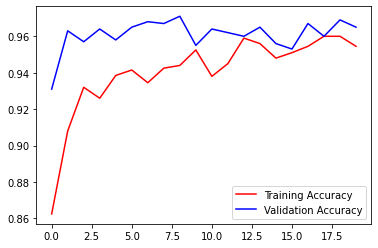

<Figure size 432x288 with 0 Axes>

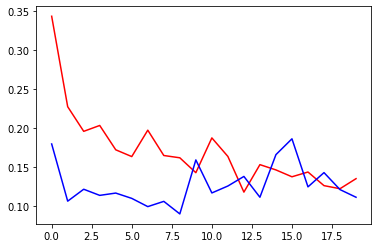

<Figure size 432x288 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.figure()


plt.show()